In [4]:
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Define the folder path
folder_path = 'data/normalized_spectrograms/'

# Get the file paths of all the image files in the folder
image_files = glob.glob(folder_path + '*.jpg')

# Create an empty list to store the image arrays
image_array = []

# Iterate over the image files
for file_path in image_files:
    # Open the image file
    image = Image.open(file_path)
    
    # Convert the image to an array
    image_array.append(np.array(image))

# Convert the list of image arrays to a single numpy array
image_array = np.array(image_array)
print(image_array.shape)

(6898, 200, 500, 3)


(1000, 200, 500, 3)


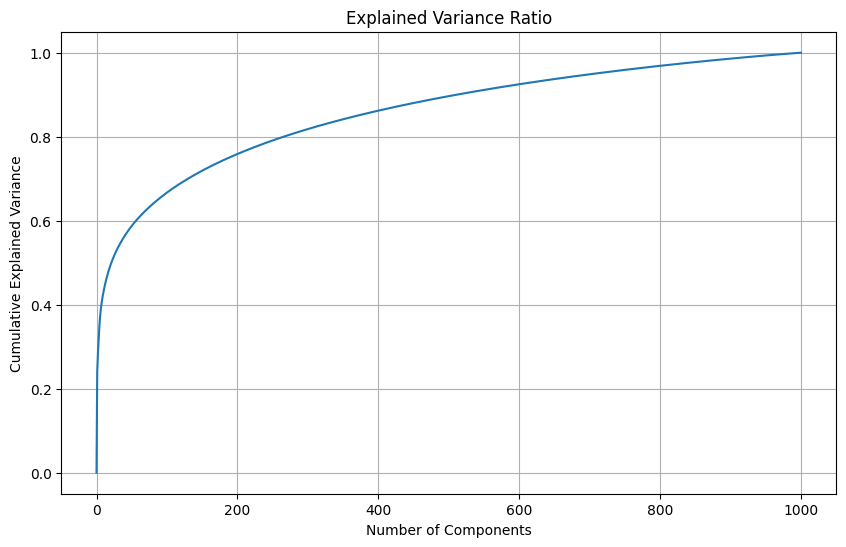

Number of components required to explain 99% of the variance: 927


In [6]:
test_sample = image_array[0:1000]
print(test_sample.shape)

# Perform PCA
pca = PCA()
n_samples, height, width, channels = test_sample.shape
test_sample_reshaped = test_sample.reshape(n_samples, height * width * channels)

pca.fit(test_sample_reshaped)

modVar = pca.explained_variance_ratio_
modVar = np.insert(modVar, 0, 0)
# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(modVar))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.grid()
plt.show()

components_above_99 = np.where(np.cumsum(pca.explained_variance_ratio_) > 0.99)[0] + 1
print(f'Number of components required to explain 99% of the variance: {components_above_99[0]}')

transformed_data = pca.transform(test_sample_reshaped)

# # Inverse transform to reconstruct images
# reconstructed_data = pca.inverse_transform(transformed_data)
# reconstructed_images = reconstructed_data.reshape(n_samples, height, width, channels)

# # Visualize original and reconstructed images
# plt.figure(figsize=(100, 50))
# for i in range(5):
#     # Original image
#     plt.subplot(2, n_samples, i + 1)
#     plt.imshow(test_sample[i])
#     plt.title('Original')
#     plt.axis('off')
    
#     # Reconstructed image
#     plt.subplot(2, n_samples, n_samples + i + 1)
#     plt.imshow(reconstructed_images[i].astype(np.uint8))
#     plt.title('Reconstructed')
#     plt.axis('off')

# plt.tight_layout()
# plt.show()

/var/folders/rw/8nrh1lbs5ngckj4mh93mhzv00000gn/T/ipykernel_36213/1000952610.py:22: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


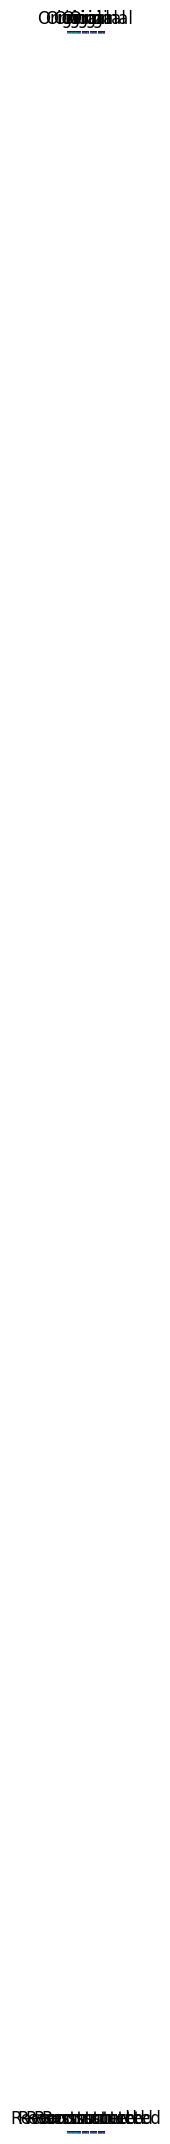

In [7]:
transformed_data = pca.transform(test_sample_reshaped)

# Inverse transform to reconstruct images
reconstructed_data = pca.inverse_transform(transformed_data)
reconstructed_images = reconstructed_data.reshape(n_samples, height, width, channels)

# Visualize original and reconstructed images
plt.figure(figsize=(100, 50))
for i in range(5):
    # Original image
    plt.subplot(2, n_samples, i + 1)
    plt.imshow(test_sample[i])
    plt.title('Original')
    plt.axis('off')
    
    # Reconstructed image
    plt.subplot(2, n_samples, n_samples + i + 1)
    plt.imshow(reconstructed_images[i].astype(np.uint8))
    plt.title('Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()